<a href="https://colab.research.google.com/github/tanya-romanova/ml_course_pylieva/blob/main/HW_2_1_Analyzing%20properties%20for%20building%20linear%20regression%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

1. Порахувати кореляції між усіма колонками-змінними.
2. Обрати ті вхідні змінні, які мають суттєву кореляцію з результатом. Вони будуть найважливішими для прогнозування результату.
3. Мені в голову приходить лише як спробувати спрогнозувати результат за допомогою однієї змінної:
  1. Оскільки ми обрали змінні які мають між собою значну кореляцію, ми можемо припустити що існує лінійна залежність між змінною і результатом.
  2. Припустимо також, що всі змінні (і результат) мають нормальний розподіл (щоб мати змогу використовувати z-values).
  3. Якщо коефіцієнт кореляції додатний, порахуємо z-value вхідної змінної, і оцінимо результат як відповідне значення цього z-value, але в розподілі змінної-результата. Ми базуємося на припущенні, що більшим значенням вхідної змінної відповідають більше значення вихідної змінної, а значить відповідні значення вхідної і вихідної змінних займатимуть однакові "місця" в відповідних розподілах.
  4. Для відʼємного коефіцієнту кореляції, z-value результату треба домножити на -1 (змінити знак).
  5. Ще ідея: використовувати (аналогічно) процентилі замість z-values, якщо ми впевнені що розподіл змінних сильно відізняється від нормального.
4. Ідея для використання декількох вхідних змінних: застосувати пункт 3. для кожної із них і усереднити всі отримані оцінки для змінної-результату.


**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

**Гіпотези:**

- Аргумент за те, що збори можуть відрізнятися залежно від статі:      
  - наприклад, жінки можуть потребувати більшої кількості медичного догляду через те, що вони можуть народжувати дітей і те, що вони живуть довше в середньому (а значить, довше перебувають в похилому віці).
- Аргумент за те, що збори можуть відрізнятися залежно від регіону:
  - наприклад, в регіонах з сильною важкою промисловістю люди можуть хворіти більше через гіршу якість повітря.
- Можливий аргумент проти: якщо уряд заборонить страхувальній компанії дискримінувати клієнтів за якимись з цих факторів.
- В цілому, припускаємо, що це клієнти з США :), і що збори залежатимуть як від статі, так і від регіону.

In [3]:
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = 'drive/MyDrive/Colab Notebooks/data/'

Mounted at /content/drive


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
medical_df = pd.read_csv(DATA_DIR + 'medical-charges.csv')

In [12]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   #color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження:**

- Гіпотеза частково справдилася. Хоча медіани зборів для чоловіків і жінок не відрізняються суттєво, 75-та процентиль суттєвл вища для чоловіків, ніж для жінок, з чого випливає, що з тих клієнтив, що мають вищі збори, більше чоловіків.

In [13]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   #color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження:**

- Гіпотеза скоріше не справдилася: Збори виглядають досить схожими по різних регіонах.

- Єдине що, southeast регіон має дещо вищу 75-ту процентиль, тому серед "дорогих клієнтів" дещо більше клієнтів цього регіону.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [14]:
px.histogram(medical_df, x='region', color='smoker', title='Region')

**Спостереження**: Кількість курців по регіонах є відносно однаковою (їх більше в абсолютному плані в southeast region, і, схоже, дещо більше і в пропорції).

In [15]:
px.histogram(medical_df, x='children', color='smoker', title='Children')

**Спостереження**: Пропорція курців в залежності від кількості дітей виглядає відносно сталою.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [20]:
px.violin(medical_df, x='children', y='charges', box=True, title='Children vs. Charges')

**Спостереження:**

- Виглядає, що кількість дітей не впливає суттєво на збори: медіани всіх підгруп по кількості дітей досить близькі.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [21]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [22]:
def estimate_charges(age, w, b):
    return w * age + b

In [23]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

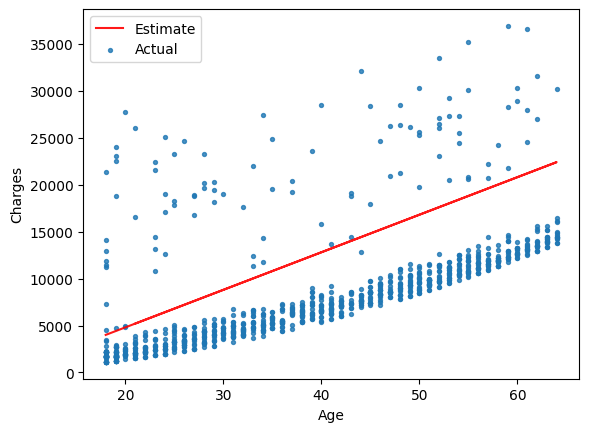

In [39]:

try_parameters(non_smoker_df, 400, -3200)

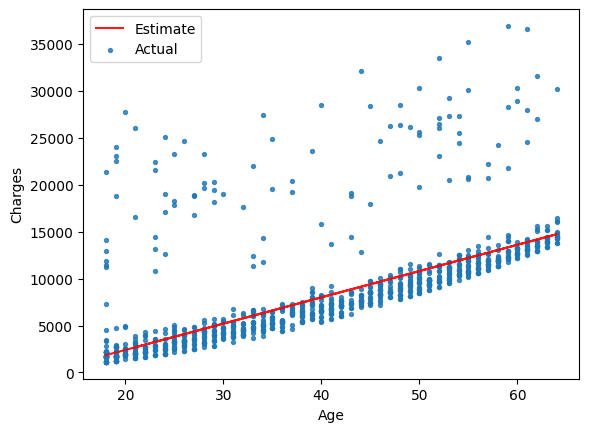

In [36]:
try_parameters(non_smoker_df, 280, -3200)

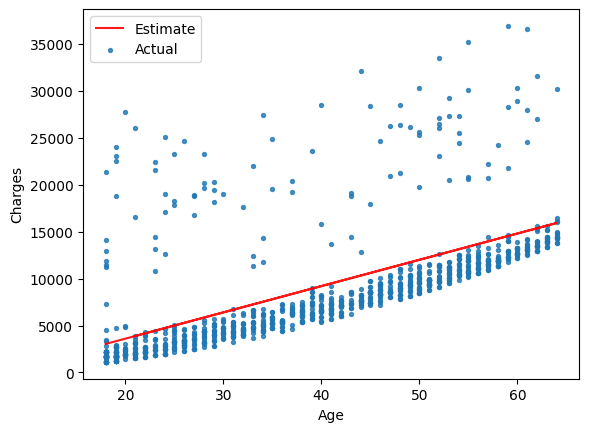

In [40]:
try_parameters(non_smoker_df, 280, -2000)

Інтуітивно, я намагалася зробити лінію з кутом нахилу як наше основне скупчення точок, але зсунуту трохи вгору, щоб врахувати "викиди".

Але не сильно, бо більшість точок все ж на лінії.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [43]:
import numpy as np

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [46]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  6496.486634976171


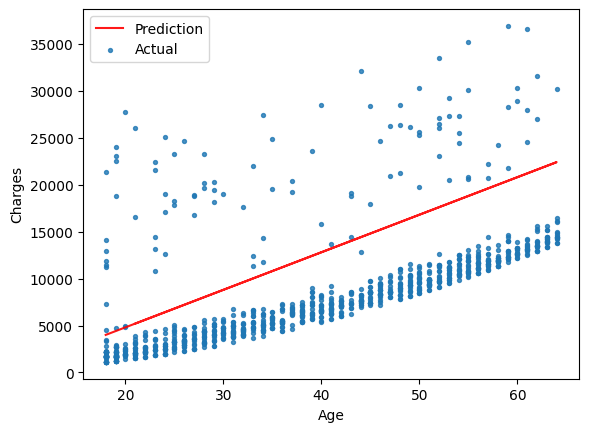

In [47]:
try_parameters(non_smoker_df, 400, -3200)

RMSE Loss:  4705.195761284241


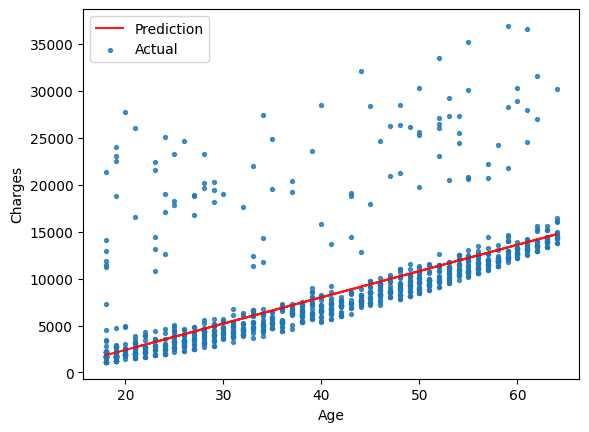

In [48]:
try_parameters(non_smoker_df, 280, -3200)

RMSE Loss:  4703.569985189265


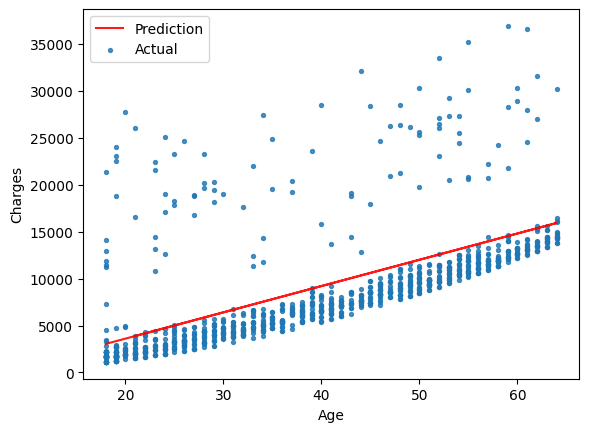

In [49]:
try_parameters(non_smoker_df, 280, -2000)

Отже, найнижче значення втрат, що я змогла досягти вручну, є ~4704.

**Загальна стратегія підбору $w$ та $b$:**

Для кожного фіксованого значення $w$ RMSE буде опуклою вниз гладкою функцією, яка буде спадати до найкращого значення $b$.

Так само RMSE буде опуклою вниз для $w$ (з їхніми відповідними оптимальними значеннями $b$).

(Я не можу довести опуклість зараз математично, але думаю це легко довести якщо продиференціювати).

Тому щоби знайти оптимальні значення $w$ та $b$, ми можемо використати будь-який чисельний метод для мінімізації для значень $w$, де всередині будемо використовувати чисельний метод для мінімізації для пошуку оптимального $b$ для фіксованого значення $w$.